## Notebook Imports

In [1]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt 
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import seaborn as sns
import numpy as np
%matplotlib inline 

%matplotlib inline will make your plot outputs appear and be stored within the notebook.

## Gather Dataset

[original research paper](https://deepblue.lib.umich.edu/handle/2027.42/22636)

In [2]:
dataset = load_boston()
dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [3]:
dir(dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [4]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
type(dataset.data)

numpy.ndarray

In [6]:
dataset.data.shape

(506, 13)

In [7]:
dataset.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [8]:
dataset.target 
# Actual prices is in 000

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

## Data Exploration with Pandas

In [9]:
# creating a pandas dataframe
data = pd.DataFrame(data = dataset.data, columns = dataset.feature_names)
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
data['PRICE'] = dataset.target

In [11]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [12]:
data.count() # print out the number of entries per column

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
PRICE      506
dtype: int64

### Data cleaning and expoloration

In [13]:
# checking for null tables with null values
pd.isnull(data).any()

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
PRICE      False
dtype: bool

### Visulasing data - Bar Chart, Distributions and Histograms

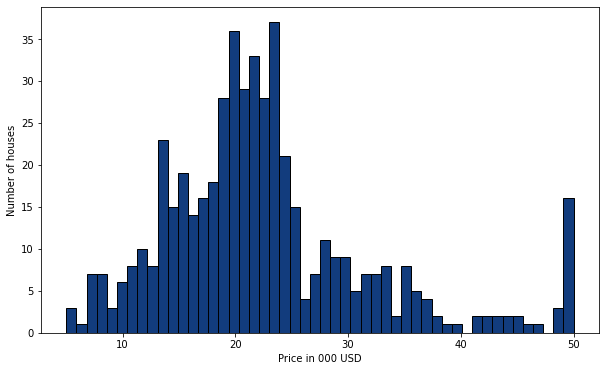

In [14]:
plt.figure(figsize=(10, 6))
plt.hist(data['PRICE'], bins=50, color='#123C7D', ec='BLACK')
plt.xlabel('Price in 000 USD')
plt.ylabel('Number of houses')
plt.show()


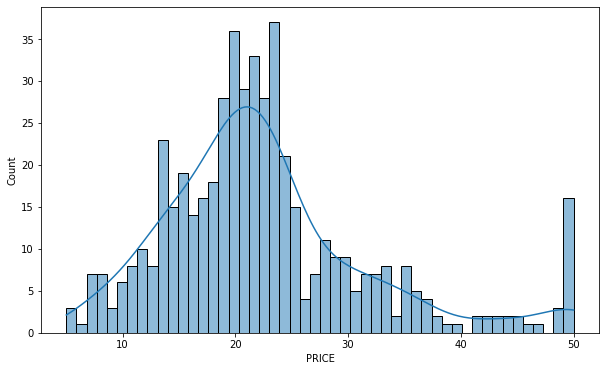

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data['PRICE'], kde='true', bins=50)
plt.show()

##   Average number of rooms 

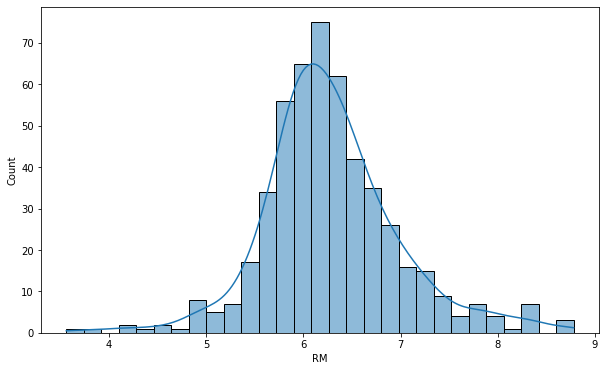

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data['RM'], kde='true')
plt.show()

In [17]:
data['RM'].mean()

6.284634387351787

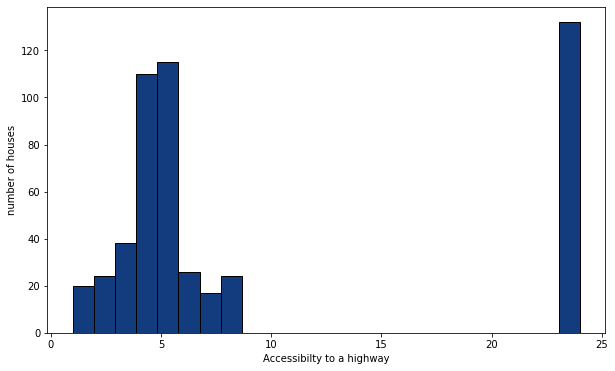

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(data['RAD'], bins=24, color='#123C7D', ec='BLACK')
plt.xlabel('Accessibilty to a highway')
plt.ylabel('number of houses')
plt.show()

In [19]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

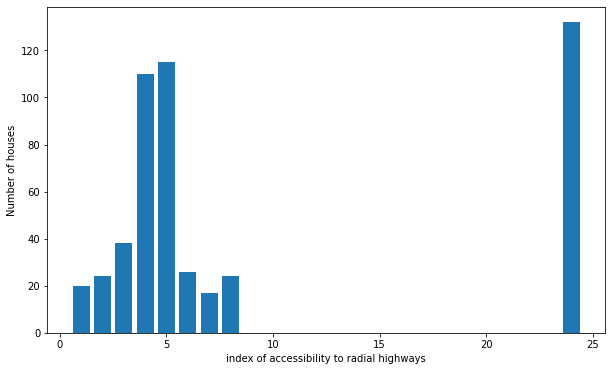

In [20]:
frequency = data['RAD'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(frequency.index,height=frequency)
plt.xlabel('index of accessibility to radial highways')
plt.ylabel('Number of houses')
plt.show()

In [21]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

## Descriptive Statistics

In [22]:
data.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
PRICE       22.532806
dtype: float64

In [23]:
data.median()

CRIM         0.25651
ZN           0.00000
INDUS        9.69000
CHAS         0.00000
NOX          0.53800
RM           6.20850
AGE         77.50000
DIS          3.20745
RAD          5.00000
TAX        330.00000
PTRATIO     19.05000
B          391.44000
LSTAT       11.36000
PRICE       21.20000
dtype: float64

In [24]:
data.min()

CRIM         0.00632
ZN           0.00000
INDUS        0.46000
CHAS         0.00000
NOX          0.38500
RM           3.56100
AGE          2.90000
DIS          1.12960
RAD          1.00000
TAX        187.00000
PTRATIO     12.60000
B            0.32000
LSTAT        1.73000
PRICE        5.00000
dtype: float64

In [25]:
data.max()

CRIM        88.9762
ZN         100.0000
INDUS       27.7400
CHAS         1.0000
NOX          0.8710
RM           8.7800
AGE        100.0000
DIS         12.1265
RAD         24.0000
TAX        711.0000
PTRATIO     22.0000
B          396.9000
LSTAT       37.9700
PRICE       50.0000
dtype: float64

## Correlation 
## $ \rho_{XY} = corr(X,Y)$
## $ -1.0 \leq \rho _{X,Y}\ 1$


In [26]:
data['PRICE'].corr(data['RM'])

0.695359947071539

In [27]:
data['PRICE'].corr(data['PTRATIO'])

-0.5077866855375615

In [28]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [29]:
mask = np.zeros_like(data.corr())
mask
triangle_indicies = np.triu_indices_from(mask)
mask[triangle_indicies] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [65]:
test = np.zeros_like(data.corr())
triangle_indicies = np.triu_indices_from(test)
test[triangle_indicies] = True
test


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

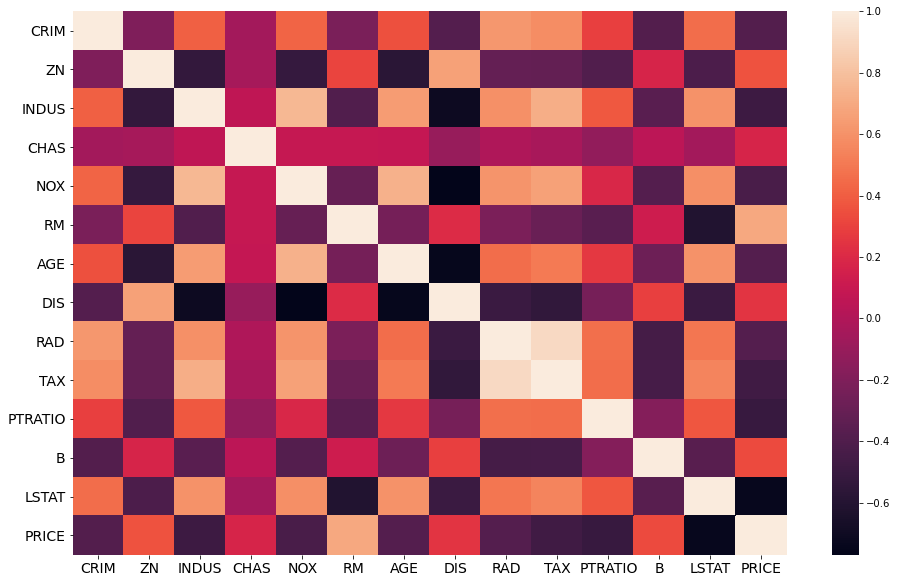

In [30]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr())
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

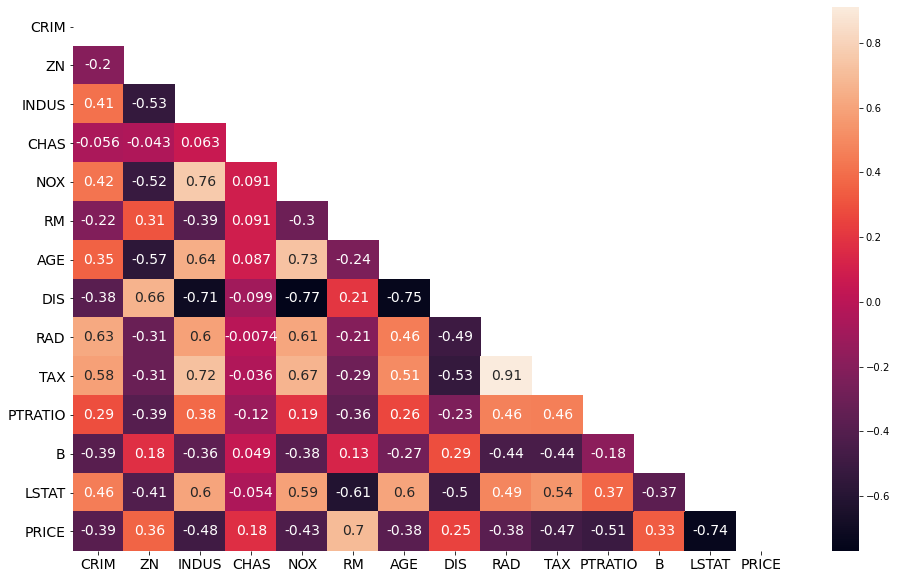

In [31]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), mask=mask, annot=True, annot_kws={'size':14})
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

important notes for looking for corellation:
1. it only works with contuniuos variable(not binary, nor dummy variables)
2. correlation doesnot neccearily mean causation(e.g every one who rank water in the 1850 is died doesnt necessarily mean that drinking water causes death)

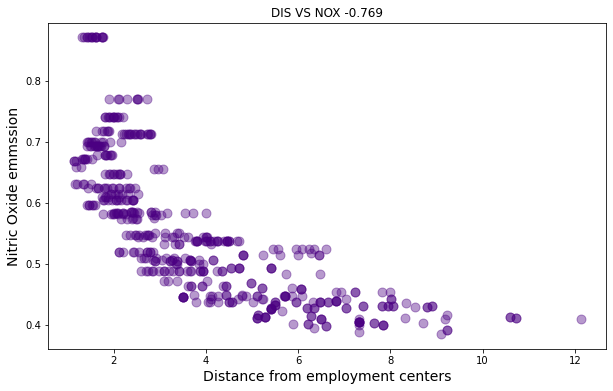

In [32]:
corr_title = round(data['DIS'].corr(data['NOX']), 3)
plt.figure(figsize=(10,6))
plt.scatter(x=data['DIS'], y=data['NOX'], alpha=0.4, color='indigo', s=80)
plt.title(f'DIS VS NOX {corr_title}')
plt.xlabel('Distance from employment centers', fontsize=14)
plt.ylabel('Nitric Oxide emmssion', fontsize=14)
plt.show()

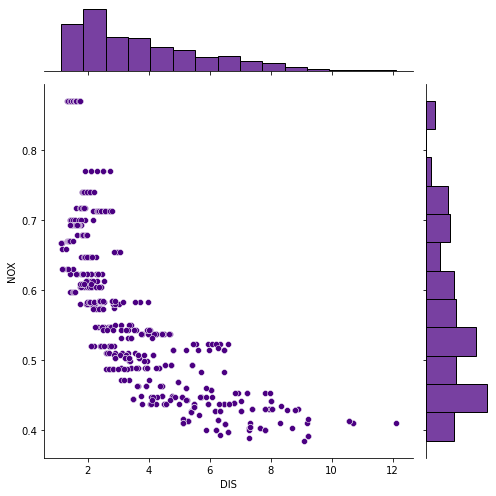

In [33]:
sns.jointplot(x=data['DIS'], y=data['NOX'], height=7, color='indigo')
plt.show()

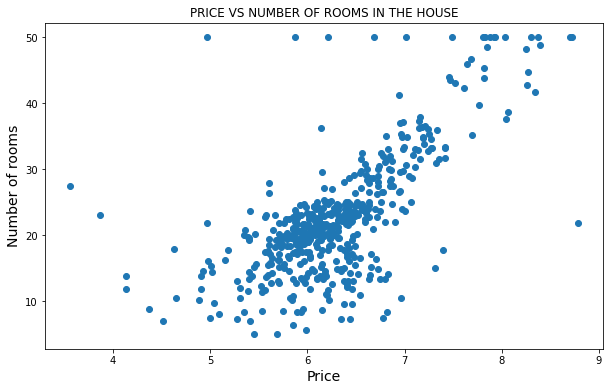

In [34]:
plt.figure(figsize=(10,6))
plt.title('PRICE VS NUMBER OF ROOMS IN THE HOUSE')
plt.xlabel('Price', fontsize=14)
plt.ylabel('Number of rooms', fontsize=14)
plt.scatter(x=data['RM'], y=data['PRICE'])
plt.show()

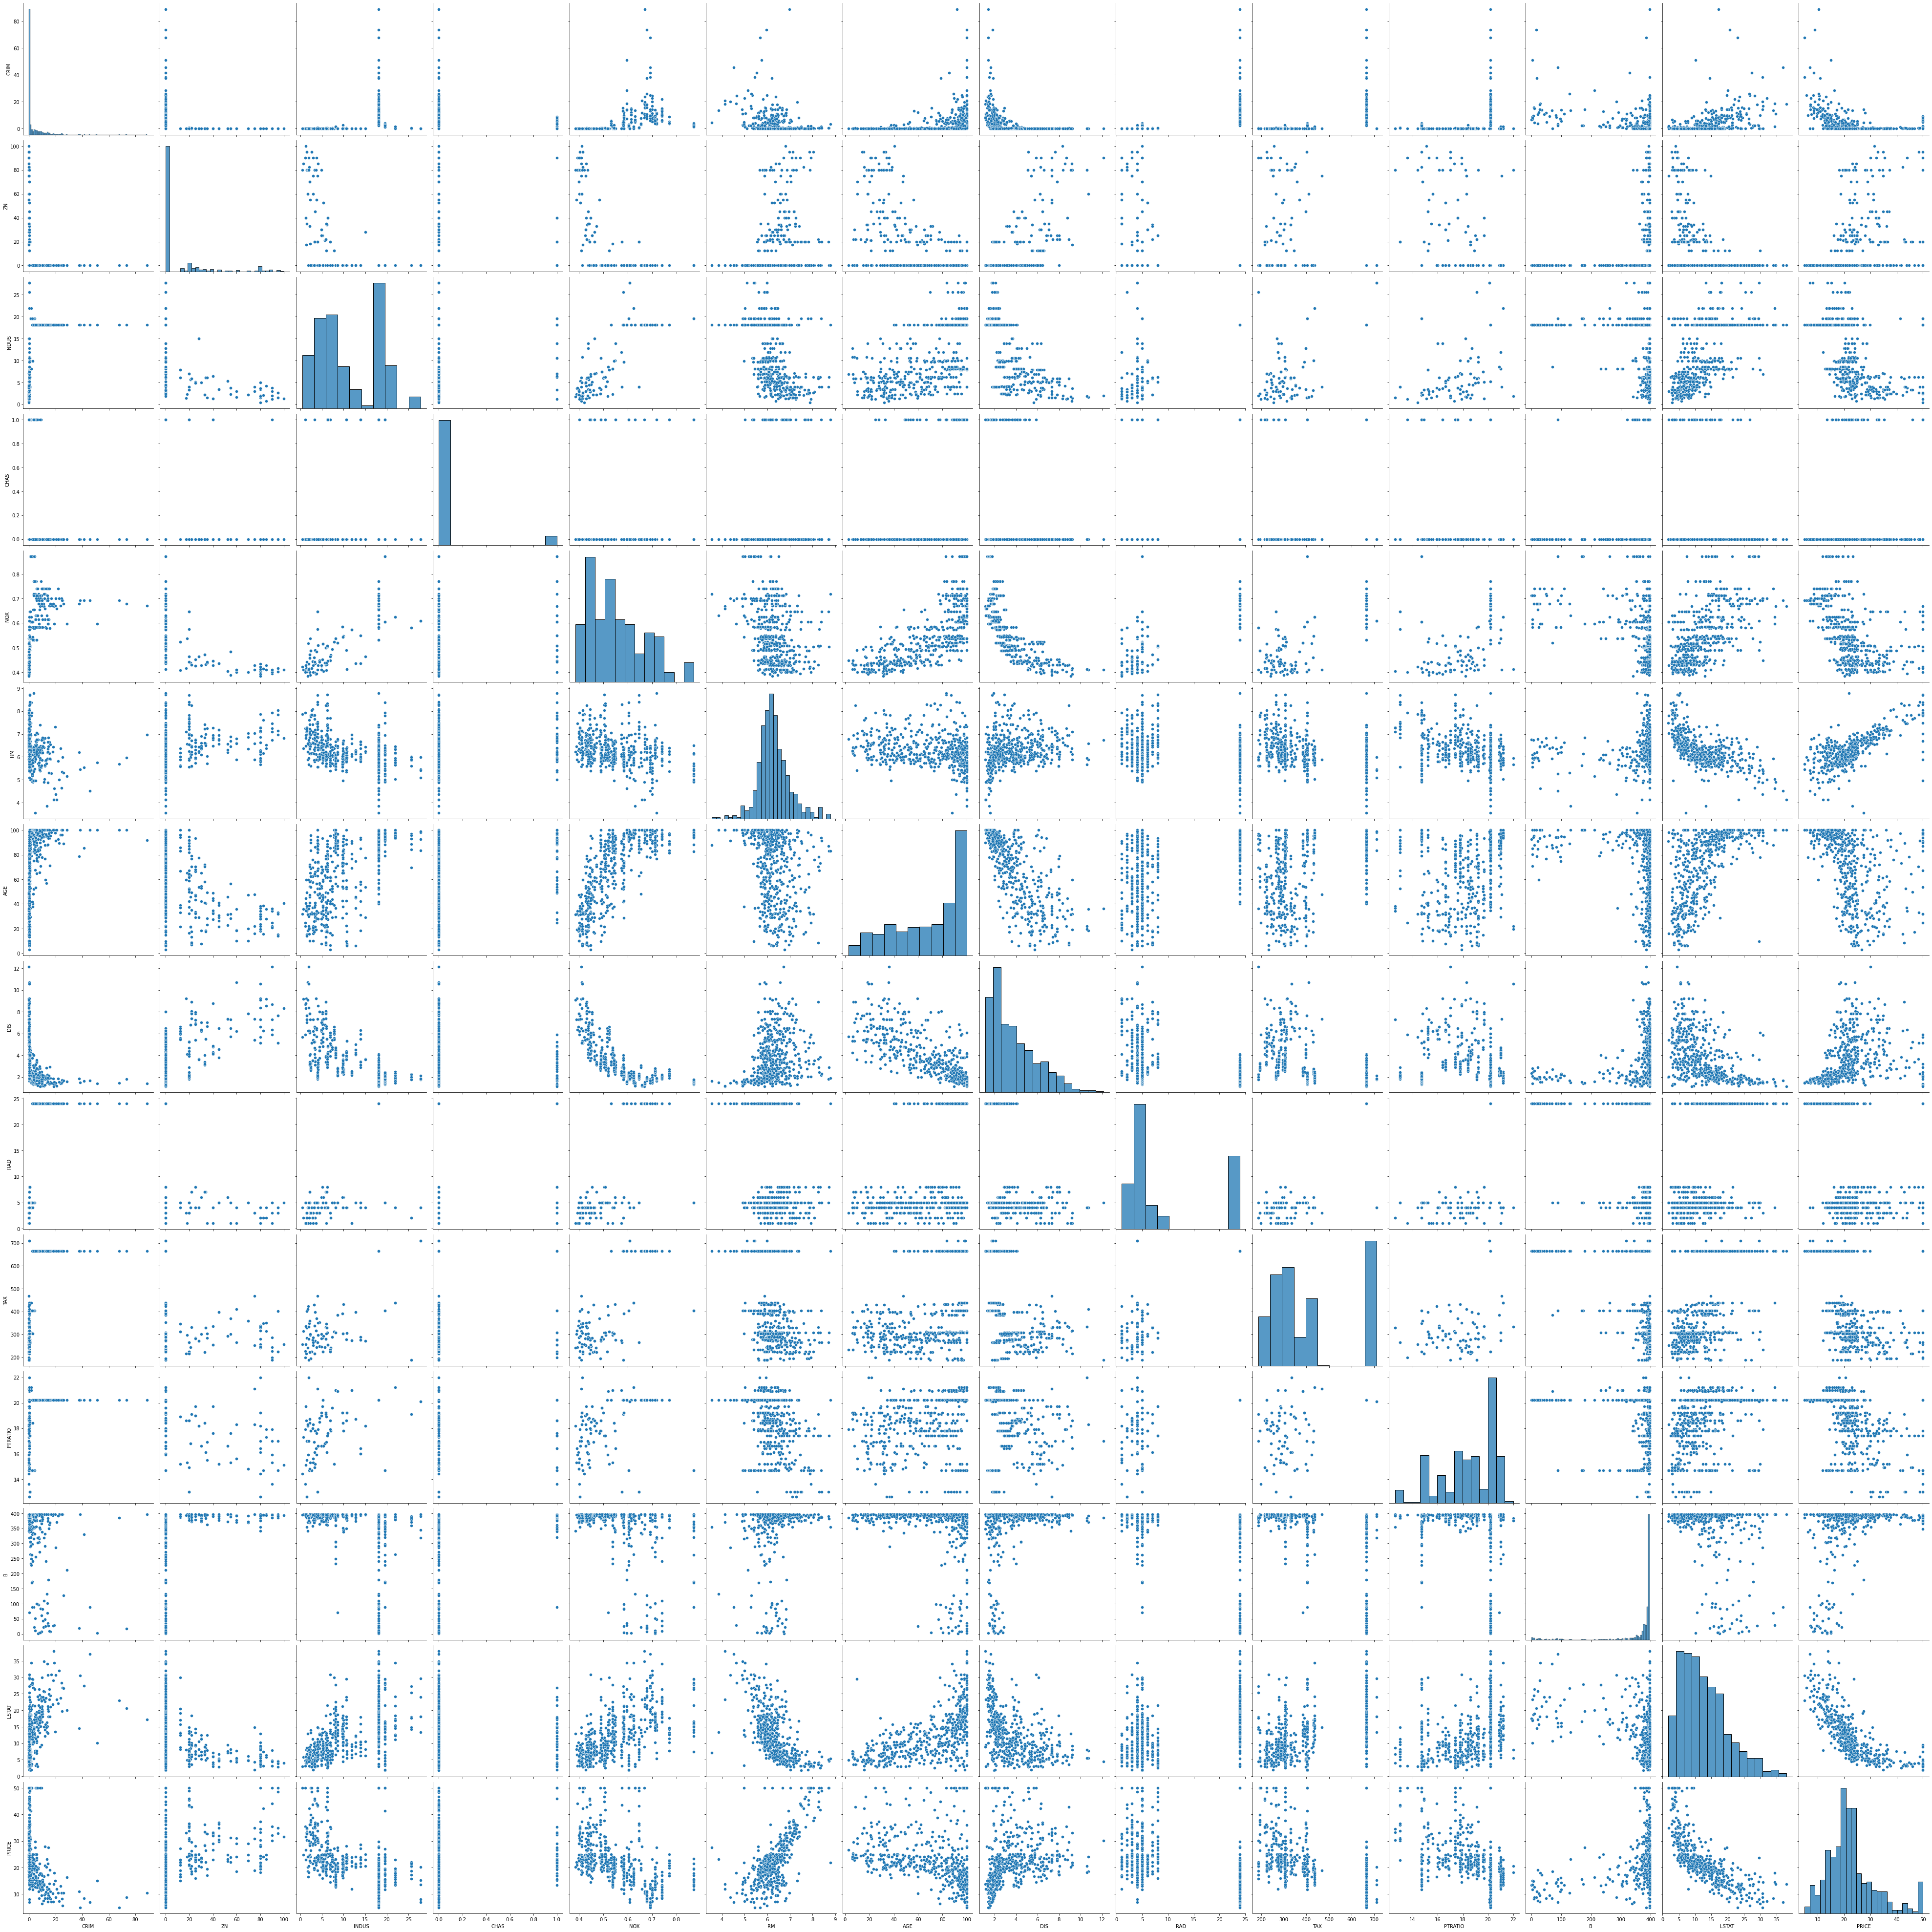

In [35]:

sns.pairplot(data, height=4)
plt.show()

## Training & Testing Dataset split

In [36]:
prices=data['PRICE']
features=data.drop('PRICE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)


In [37]:
# verify the split has happended (THE TOTAL NUMBER OF ROWS IN X_TRAIN DIVIDED BY THE TOTAL NUMBER OF ROWS)
len(X_train)/len(features)

0.7984189723320159

## Multivariable Regression


In [38]:
reg = LinearRegression()
reg.fit(X_train, y_train)
print('Intercept', reg.intercept_)
pd.DataFrame(data=reg.coef_, index=X_train.columns, columns=['coeff'])

Intercept 36.53305138282439


,coeff
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [39]:
print('Training data r-squared', reg.score(X_train, y_train))
print('Training data r-squared', reg.score(X_test, y_test))

Training data r-squared 0.750121534530608
Training data r-squared 0.6709339839115628


## Data Transformation 

In [40]:
data['PRICE'].skew()

1.1080984082549072

In [41]:
y_log = np.log(data['PRICE'])

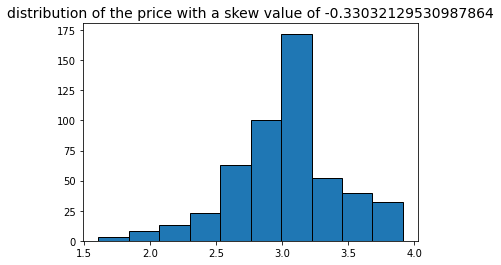

In [42]:

plt.hist(y_log, ec='black')
plt.title(f'distribution of the price with a skew value of {y_log.skew()}', fontsize=14)
plt.show()

## P values and Evaluating coefficients

In [43]:
x_include_cons = sm.add_constant(X_train)
model = sm.OLS(y_train, x_include_cons)
results=model.fit()

# results.params
# results.pvalues
pd.DataFrame({'coef':results.params, 'p-value':round(results.pvalues, 3)})

,coef,p-value
const,36.533051,0.000
CRIM,-0.128181,0.000
ZN,0.063198,0.000
INDUS,-0.007576,0.905
CHAS,1.974515,0.033
NOX,-16.271989,0.000
RM,3.108456,0.000
AGE,0.016292,0.262
DIS,-1.483014,0.000
RAD,0.303988,0.000


In [44]:
# .values changes it into ndimensional array
variance_inflation_factor(exog=x_include_cons.values, exog_idx=1)

1.7145250443932485

In [45]:
len(x_include_cons.columns)

14

In [46]:
for i in range (x_include_cons.shape[1]):
    print(variance_inflation_factor(exog=x_include_cons.values, exog_idx=i))


597.5487126763895
1.7145250443932485
2.3328224265597584
3.943448822674636
1.0788133385000576
4.410320817897634
1.8404053075678568
3.3267660823099408
4.222923410477865
7.314299817005058
8.508856493040817
1.839911632651406
1.3386713255364715
2.812544292793034


In [47]:
vif = []
for i in range (x_include_cons.shape[1]):
    vif.append(variance_inflation_factor(exog=x_include_cons.values, exog_idx=i))
    
print(vif)


[597.5487126763895, 1.7145250443932485, 2.3328224265597584, 3.943448822674636, 1.0788133385000576, 4.410320817897634, 1.8404053075678568, 3.3267660823099408, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.839911632651406, 1.3386713255364715, 2.812544292793034]


In [48]:
pd.DataFrame({'coef_name':x_include_cons.columns, 'vif':np.around(vif, 2)})

,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


In [49]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


## Model Simplification and BIC 

In [50]:
x_include_cons = sm.add_constant(X_train)
model = sm.OLS(y_train, x_include_cons)
results=model.fit()

# results.params
# results.pvalues
org_coeff = pd.DataFrame({'coef':results.params, 'p-value':round(results.pvalues, 3)})
print(f'BIC Value is: {results.bic}')
print(f'rsquared Value is: {results.rsquared}')

BIC Value is: 2424.9546968561976
rsquared Value is: 0.750121534530608


In [51]:
# Expeirement 1: Reduced Indus from the features
x_include_cons = sm.add_constant(X_train)
x_include_cons = x_include_cons.drop(['INDUS'], axis=1)

# training the model
model = sm.OLS(y_train, x_include_cons)
results=model.fit()

# results.params
# results.pvalues
reduced_coeff = pd.DataFrame({'coef':results.params, 'p-value':round(results.pvalues, 3)})
print(f'BIC Value is: {results.bic}')
print(f'rsquared Value is: {results.rsquared}')

BIC Value is: 2418.968071323753
rsquared Value is: 0.7501123869895048


In [52]:
# Expeirement 2: Reduced age and age from the features
x_include_cons = sm.add_constant(X_train)
x_include_cons = x_include_cons.drop(['AGE', 'INDUS'], axis=1)

# training the model
model = sm.OLS(y_train, x_include_cons)
results=model.fit()

# results.params
# results.pvalues
reduced_coeff_1= pd.DataFrame({'coef':results.params, 'p-value':round(results.pvalues, 3)})
print(f'BIC Value is: {results.bic}')
print(f'rsquared Value is: {results.rsquared}')

BIC Value is: 2414.269332783494
rsquared Value is: 0.7493053373352907


In [53]:
frames = [org_coeff, reduced_coeff, reduced_coeff_1]
pd.concat(frames, 1)

,coef,p-value,coef,p-value,coef,p-value
const,36.533051,0.000,36.546910,0.000,36.115550,0.000
CRIM,-0.128181,0.000,-0.127995,0.000,-0.127574,0.000
ZN,0.063198,0.000,0.063305,0.000,0.061404,0.000
INDUS,-0.007576,0.905,NaN,NaN,NaN,NaN
CHAS,1.974515,0.033,1.965315,0.033,2.042927,0.026
NOX,-16.271989,0.000,-16.386584,0.000,-15.177678,0.000
RM,3.108456,0.000,3.114671,0.000,3.207983,0.000
AGE,0.016292,0.262,0.016280,0.262,NaN,NaN
DIS,-1.483014,0.000,-1.476442,0.000,-1.546495,0.000
RAD,0.303988,0.000,0.306045,0.000,0.300285,0.000


## Residual and Residual Plots

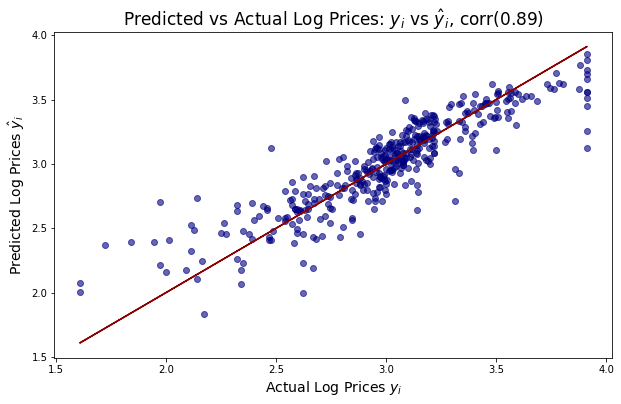

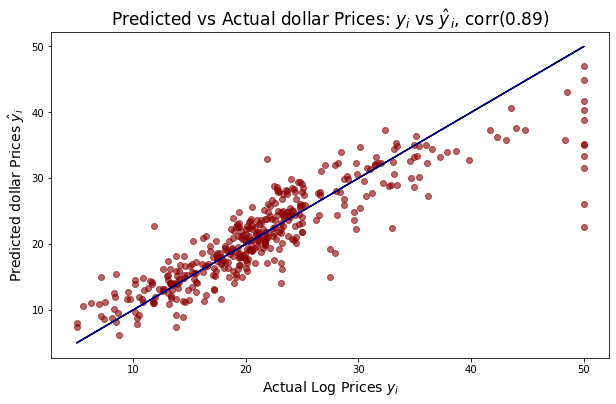

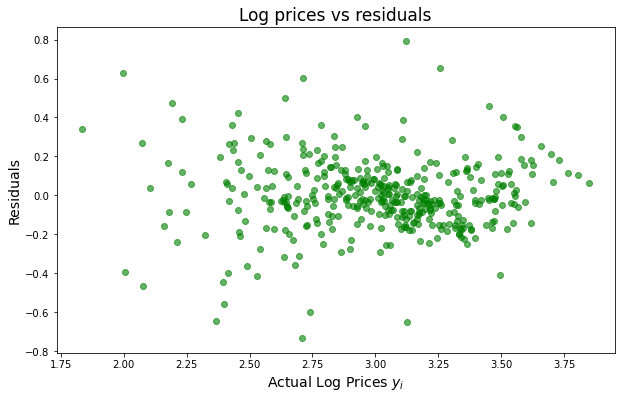

In [54]:
# Modified data using log prices and dropped two features (age, indus)

prices = np.log(data['PRICE'])
features = data.drop(['PRICE', 'INDUS', 'AGE'], 1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

x_include_cons = sm.add_constant(X_train)
model = sm.OLS(y_train, x_include_cons)
results=model.fit()

# manual way of calcultaing the residues
# residuals = y_train - results.fittedvalues
# residuals

results.resid


corr = round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize=(10,6))
plt.scatter(y_train, results.fittedvalues, alpha=0.6, c='navy')
plt.plot(y_train, y_train, color='darkred')
plt.xlabel('Actual Log Prices $y_i$', fontsize=14)
plt.ylabel('Predicted Log Prices $\hat y_i$', fontsize=14)
plt.title(f'Predicted vs Actual Log Prices: $y_i$ vs $\hat y_i$, corr({corr})', fontsize=17)
plt.show()


# Actaul dollar prices 
plt.figure(figsize=(10,6))
plt.scatter(np.e**y_train, np.e**results.fittedvalues, alpha=0.6, c='darkred')
plt.plot(np.e**y_train, np.e**y_train, color='navy')
plt.xlabel('Actual Log Prices $y_i$', fontsize=14)
plt.ylabel('Predicted dollar Prices $\hat y_i$', fontsize=14)
plt.title(f'Predicted vs Actual dollar Prices: $y_i$ vs $\hat y_i$, corr({corr})', fontsize=17)
plt.show()

# residuals vs predicted prices
plt.figure(figsize=(10,6))
plt.scatter(results.fittedvalues,results.resid , alpha=0.6, c='green')
plt.xlabel('Actual Log Prices $y_i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Log prices vs residuals', fontsize=17)
plt.show()

# Mean square error & r-squred
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_square = round(results.rsquared, 3)


/home/goodluck/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


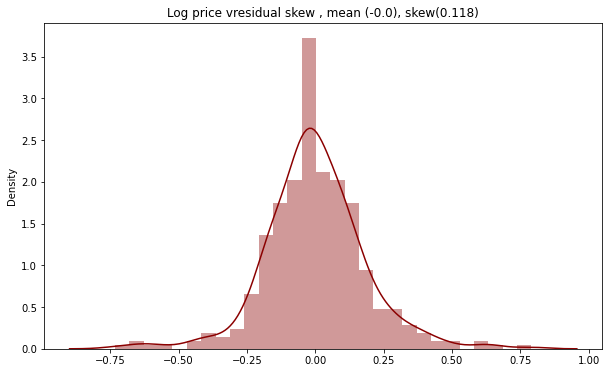

In [55]:
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(),3)

plt.figure(figsize=(10, 6 ))
sns.distplot(results.resid, color='darkred')
plt.title(f'Log price vresidual skew , mean ({resid_mean}), skew({resid_skew})')
plt.show()


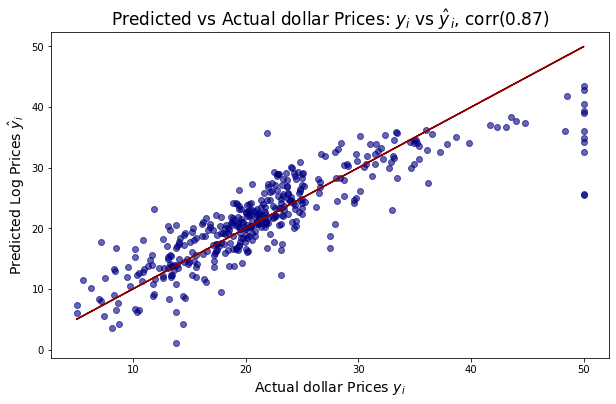

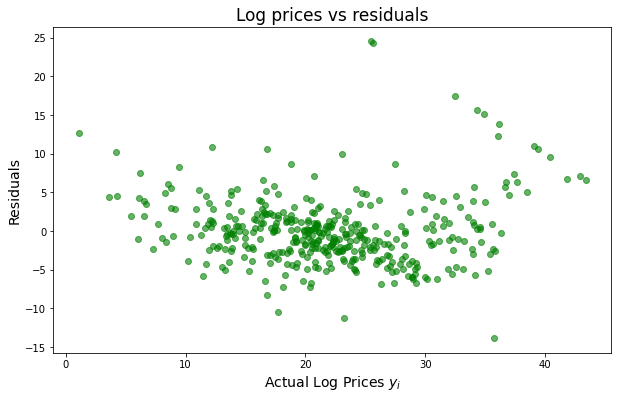

/home/goodluck/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


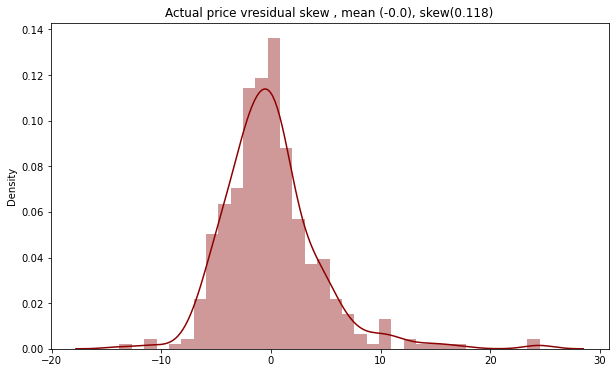

In [56]:
# Modified data using log prices and dropped two features (age, indus)

prices = data['PRICE']
features = data.drop(['PRICE'], 1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

x_include_cons = sm.add_constant(X_train)
model = sm.OLS(y_train, x_include_cons)
results=model.fit()

# manual way of calcultaing the residues
# residuals = y_train - results.fittedvalues
# residuals

results.resid


corr = round(y_train.corr(results.fittedvalues), 2)
plt.figure(figsize=(10,6))
plt.scatter(y_train, results.fittedvalues, alpha=0.6, c='navy')
plt.plot(y_train, y_train, color='darkred')
plt.xlabel('Actual dollar Prices $y_i$', fontsize=14)
plt.ylabel('Predicted Log Prices $\hat y_i$', fontsize=14)
plt.title(f'Predicted vs Actual dollar Prices: $y_i$ vs $\hat y_i$, corr({corr})', fontsize=17)
plt.show()



# residuals vs predicted prices
plt.figure(figsize=(10,6))
plt.scatter(results.fittedvalues,results.resid , alpha=0.6, c='green')
plt.xlabel('Actual Log Prices $y_i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.title('Log prices vs residuals', fontsize=17)
plt.show()

# Residual distribtuin chart
plt.figure(figsize=(10, 6 ))
sns.distplot(results.resid, color='darkred')
plt.title(f'Actual price vresidual skew , mean ({resid_mean}), skew({resid_skew})')
plt.show()

# Mean square error & r-squred
full_normal_mse = round(results.mse_resid, 3)
full_normal_square = round(results.rsquared, 3)




In [57]:

# Mean square error & r-squred
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_square = round(results.rsquared, 3)

In [58]:
pd.DataFrame({'r-squared':[reduced_log_square,full_normal_square], 'MSE':[reduced_log_mse, full_normal_mse],
             'RSME':np.sqrt([reduced_log_mse, full_normal_mse])}, 
             index=['reduced log  price', 'full normal price'],)

,r-squared,MSE,RSME
reduced log price,0.75,19.921,4.463295
full normal price,0.75,19.921,4.463295


In [59]:
# for the estimate price for 30,000,  calculate the lower bound and the upper bound for the 95%

print('1: standard deviation in log prices is', np.sqrt(reduced_log_mse))
print('2: standard deviation in log prices is', 2*np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2*np.sqrt(reduced_log_mse)
print('The upper bound for the 95% prediction interval in log prices is:', upper_bound)
print(f'The upper bound for the 95% prediction interval actual price is:{(np.e**upper_bound)*1000}$' )
print()

lower_bound = np.log(30) - 2*np.sqrt(reduced_log_mse)
print('The lower bound for the 95% prediction interval in log prices is:', lower_bound)
print(f'The lower bound for the 95% prediction interval actual price is:{(np.e**lower_bound)*1000}$' )

1: standard deviation in log prices is 4.463294747157082
2: standard deviation in log prices is 8.926589494314165
The upper bound for the 95% prediction interval in log prices is: 12.32778687597632
The upper bound for the 95% prediction interval actual price is:225886259.71610966$

The lower bound for the 95% prediction interval in log prices is: -5.525392112652009
The lower bound for the 95% prediction interval actual price is:3.9843060889631206$
